<a href="https://colab.research.google.com/github/shanajames0808/Internship-at-Spark-Foundation--Tasks/blob/main/Task_2_Predict_the_optimum_number_of_clusters_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

In [10]:
df_iris = pd.DataFrame(iris.data,columns=iris['feature_names'])

In [16]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df_target = pd.DataFrame({"tardet" : iris.target})

In [32]:
def f_name(f):
  if (f==0) :
    return (iris.target_names[0])
  elif (f==1) :
    return (iris.target_names[1])
  else :
    return (iris.target_names[2])

In [33]:
df_target['feature']=df_target['tardet'].apply(f_name)

In [34]:
df_target

,tardet,feature
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,2,virginica
147,2,virginica
148,2,virginica


In [36]:
x = df_iris.iloc[:, [0, 1, 2, 3]].values

In [38]:
from sklearn.cluster import KMeans
wcss = []

In [39]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [40]:
wcss

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

In [42]:
import matplotlib.pyplot as plt

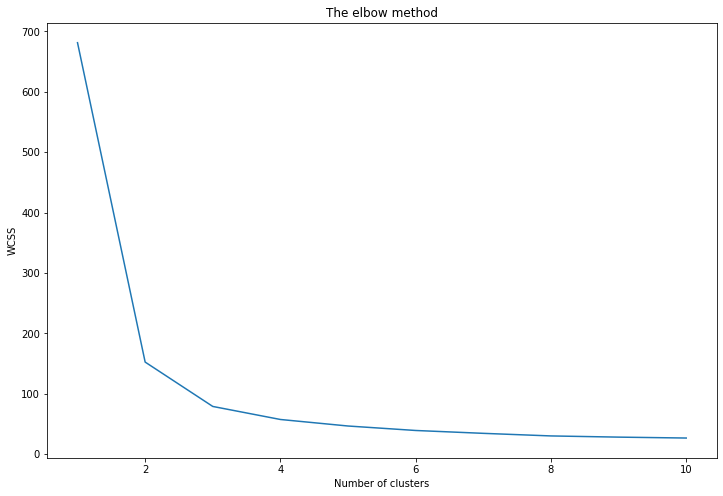

In [52]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [44]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)



In [45]:
y_kmeans = kmeans.fit_predict(x)

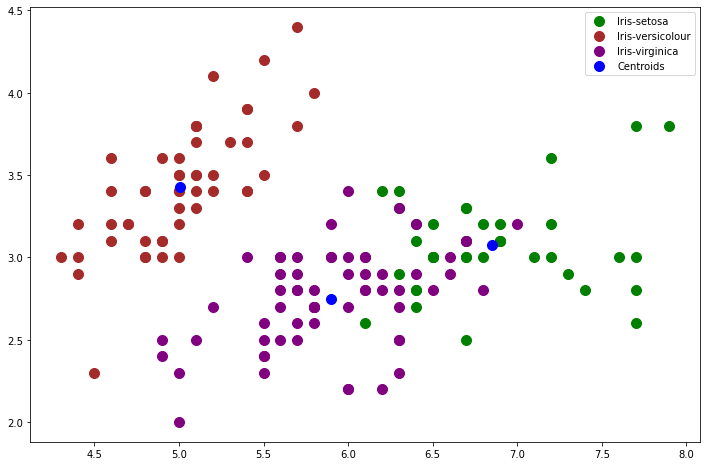

In [51]:
plt.figure(figsize=(12,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'brown', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'blue', label = 'Centroids')

plt.legend()